## Process outline 

### Expected user Input

In order to make the first iteration easy, we need to set some expectation about the input in order to make our blue print filtering easier to handle.

For now it should be reasonable to expect the user to input a floor plan with the 1 floor region for each floor. Floor plans come in PDF format and they might contain an image with multiple floors. Having multiple floors and text/marks outside of the floor can potentially have unfroessen consequences to the described process below. With todays tech it should be relatively easy to conform to these input restrictions (for example you can easily crop using native image apps for phones) so I think it's ok to set these restrictions in place.

Once the cropped floorplan for a particular floor only is used as input then we can start the process of extracting the hallways/corridors with a similar algorithm proposed by the following research paper:

https://www.researchgate.net/publication/4360122_Construct_three-dimensional_route_from_blueprint_image_of_building

The reasearch paper suggests to do the following:
binary image => image thinning => line segments extraction

However this approach was only considering a very basic floor plan. Based on the floor plan samples I was given there are a lot of "noise" that needs to be filtered out prior to performing step 2. Those involve the following:
1. Curve lines removal (for removing doors, since they are usually denoted by img insertion)
1. Double line to single line convertion (floorplans often use double lines in order to denote walls, we need to adjust and make it a single line)
1. Text filter, a lot of text is used to label rooms, there are many lirbaries for text detection in image processing that can be used to 
1. Dots and small circle removals, a lot of figures are used to denote receptecale, motorized exhaust fan etc. these can be filtered out 

So far the binary image and image thinnking has been done, but the 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import copy
from skimage.util import img_as_ubyte
from skimage.morphology import skeletonize
from skimage.util import invert
from skimage.segmentation import flood_fill

In [3]:
# Source https://github.com/jmlipman/LAID/blob/master/IP/Otsu/otsu.py
def otso_threshold(img):
    [hist, _] = np.histogram(img, bins=256, range=(0, 255))
    # Normalization so we have probabilities-like values (sum=1)
    hist = 1.0*hist/np.sum(hist)

    val_max = -999
    thr = -1
    for t in range(1,255):
        # Non-efficient implementation
        q1 = np.sum(hist[:t])
        q2 = np.sum(hist[t:])
        m1 = np.sum(np.array([i for i in range(t)])*hist[:t])/q1
        m2 = np.sum(np.array([i for i in range(t,256)])*hist[t:])/q2
        val = q1*(1-q1)*np.power(m1-m2,2)
        if val_max < val:
            val_max = val
            thr = t
    return thr

def binarize_img(img):
    copy_img = copy.deepcopy(img)
    tresh = otso_threshold(copy_img)

    for i in range(len(copy_img)):
        for j in range(len(copy_img[i])):
            if copy_img[i][j] >= tresh:
                copy_img[i][j] = 1
            else: 
                copy_img[i][j] = 0
    return copy_img

def convert_to_gray(img):
    r_img, g_img, b_img = copy.deepcopy(img), copy.deepcopy(img), copy.deepcopy(img)
    r_img = img[:, :, 0]
    g_img = img[:, :, 1]
    b_img = img[:, :, 2]
    intensity_img = 0.299*r_img + 0.587*g_img + 0.114*b_img
    
    return intensity_img

def get_binary_img(img_path):
    img = plt.imread(img_path)
    img = img_as_ubyte(img)
    gray_img = convert_to_gray(img)
    binary_img = binarize_img(gray_img)
    return binary_img

def skeletonize_img_path(img_path):
    binary_img = get_binary_img(img_path)
    skeleton = skeletonize(binary_img)
    invert_skeleton = invert(skeleton)
    
    return invert_skeleton

def skeletonize_img_array(img):
    skeleton = skeletonize(img)
    invert_skeleton = invert(skeleton)
    
    return invert_skeleton

In [4]:
img = get_binary_img("floorplans/research_paper_sample_binarization.png")

plt.imshow(img, cmap='gray')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'floorplans/research_paper_sample_binarization.png'

<ipython-input-2-2dd27459218c>:13: RuntimeWarning: invalid value encountered in double_scalars
  m1 = np.sum(np.array([i for i in range(t)])*hist[:t])/q1


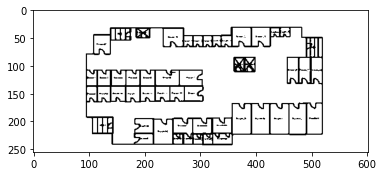

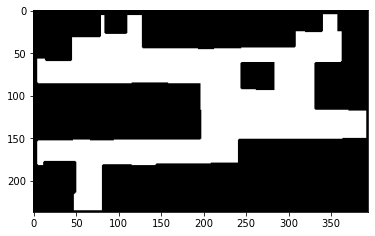

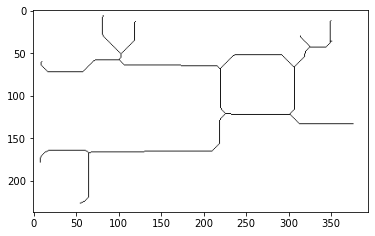

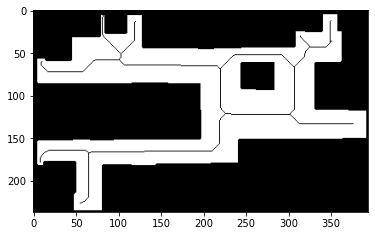

In [4]:
orig_img =  get_binary_img("floorplans/research_paper_sample.png")
plt.imshow(orig_img, cmap='gray')
plt.show()

img =  get_binary_img("floorplans/research_paper_sample_binarization.png")
plt.imshow(img, cmap='gray')
plt.show()

# perform skeletonization
skeleton_img = skeletonize_img_path("floorplans/research_paper_sample_binarization.png")
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

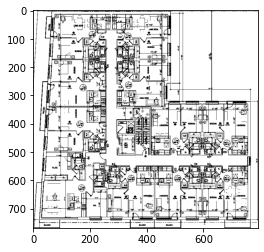

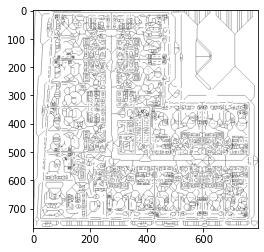

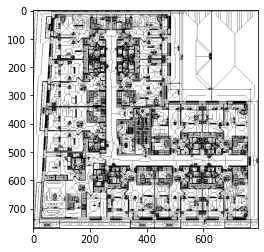

NameError: name 'Image' is not defined

In [5]:
binary_img = get_binary_img('floorplans/floor_plan_sample.png')
plt.imshow(binary_img, cmap='gray')
plt.show()

skeleton_img = skeletonize_img_path('floorplans/floor_plan_sample.png')
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(binary_img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

# from PIL import Image
im = Image.fromarray(merged)
im.save("merged.png")

In [ ]:
binary_img = get_binary_img('floorplans/floor_plan_sample_small.png')
plt.imshow(binary_img, cmap='gray')
plt.show()

skeleton_img = skeletonize_img_path('floorplans/floor_plan_sample_small.png')
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(binary_img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

# from PIL import Image
im = Image.fromarray(merged)
im.save("merged.png")

In [ ]:
binary_img = get_binary_img('floorplans/floor_plan_sample_small.png')
plt.imshow(binary_img, cmap='gray')
plt.show()

skeleton_img = skeletonize_img_path('floorplans/floor_plan_sample_small.png')
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(binary_img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

# from PIL import Image
# im = Image.fromarray(merged)
# im.save("merged.png")

In [ ]:
plt.imshow(binary_img, cmap='gray')
plt.show()

skeleton_img = skeletonize_img('floorplans/floor_plan_sample_small_filtered.png')
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(binary_img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

# from PIL import Image
# im = Image.fromarray(merged)
# im.save("merged.png")

In [ ]:
binary_img = get_binary_img('floorplans/floor_plan_sample_small_filtered_without_doors.png')
plt.imshow(binary_img, cmap='gray')
plt.show()

skeleton_img = skeletonize_img_path('floorplans/floor_plan_sample_small_filtered_without_doors.png')
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(binary_img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

# from PIL import Image
im = Image.fromarray(merged)
im.save("merged_filtered_without_doors.png")

In [18]:
def duplicate_pixels(img, pixel_value, region_width):
    img_copy = copy.deepcopy(img)
    for i in range(img_copy.shape[0]):
        for j in range(img_copy.shape[1]):
            if img[i][j] == pixel_value:
                fill_values(img_copy, pixel_value, region_width, i, j)
    return img_copy

def fill_values(img, new_pixel_value, region_width, i, j):
        half_width = region_width//2
        
        i_indices_current = max(i - half_width, 0)
        i_indices_end = min(i + half_width, img.shape[0] - 1)
        
        j_indices_current, j_indices_start = max(j - half_width, 0), max(j - half_width, 0)
        j_indices_end =  min(j + half_width, img.shape[1] - 1)

        while i_indices_current <= i_indices_end:
            while j_indices_current <= j_indices_end:
                img[i_indices_current][j_indices_current] = new_pixel_value          
                j_indices_current += 1
            j_indices_current = j_indices_start
            i_indices_current += 1
            
def volume_filler(img, filter_value, fill_value, max_volume):
    visited = {}
    img_copy = copy.deepcopy(img)
    for i in range(img_copy.shape[0]):
#         print('ith row {}'.format(i))
        for j in range(img_copy.shape[1]):
            if img_copy[i][j] == filter_value and not already_visited(visited, i, j):
                island_pixels = island_filler(img_copy, i, j, filter_value, fill_value, 1, visited, max_volume)
                if island_pixels is not None:
                    img_copy[i, j] = fill_value
                    for pixel in island_pixels:
                        img_copy[pixel[0], pixel[1]] = fill_value
    return img_copy

def check_for_continous(row, filter_value, max_volume):
    continous_count = 0
    for i in row:
        if i != filter_value:
            if continous_count >= 1 and continous_count <= max_volume:
                return True
            continous_count = 0
        else:
            continous_count += 1
    return False

def island_filler(img, i, j, island_value, fill_value, current_count, visited, max_treshhold):
    # Pixel has 8 surrounding pixels
    surrounding_islands = []
    if within_boundaries(img, i-1, j-1) and (img[i-1][j-1] == island_value and not already_visited(visited, i-1, j-1)):
        surrounding_islands.append((i-1, j-1))
        set_visited(visited, i-1, j-1)
    if within_boundaries(img, i-1, j) and (img[i-1][j] == island_value and not already_visited(visited, i-1, j)):
        surrounding_islands.append((i-1, j))
        set_visited(visited, i-1, j)
    if within_boundaries(img, i-1, j+1) and (img[i-1][j+1] == island_value and not already_visited(visited, i-1, j+1)):
        surrounding_islands.append((i-1, j+1))
        set_visited(visited, i-1, j+1)
    
    if within_boundaries(img, i, j-1) and (img[i][j-1] == island_value and not already_visited(visited, i, j-1)):
        surrounding_islands.append((i, j-1))
        set_visited(visited, i, j-1)
    if within_boundaries(img, i, j+1) and (img[i][j+1] == island_value and not already_visited(visited, i, j+1)):
        surrounding_islands.append((i, j+1))
        set_visited(visited, i, j+1)
    
    if within_boundaries(img, i+1, j-1) and (img[i+1][j-1] == island_value and not already_visited(visited, i+1, j-1)):
        surrounding_islands.append((i+1, j-1))
        set_visited(visited, i+1, j-1)
    if within_boundaries(img, i+1, j) and (img[i+1][j] == island_value and not already_visited(visited, i+1, j)):
        surrounding_islands.append((i+1, j))
        set_visited(visited, i+1, j)
    if within_boundaries(img, i+1, j+1) and (img[i+1][j+1] == island_value and not already_visited(visited, i+1, j+1)):
        surrounding_islands.append((i+1, j+1))
        set_visited(visited, i+1, j+1)

    current_count += len(surrounding_islands)
    
    if current_count > max_treshhold:
        return None
    for island in surrounding_islands:
        islands = island_filler(img, island[0], island[1], island_value, fill_value, current_count, visited, max_treshhold)
        if islands is None:
            return None
        else:
            surrounding_islands += islands
    return surrounding_islands

def set_visited(visited, i, j):
    if i not in visited:
        visited[i] = {}
    visited[i][j] = True

def already_visited(visited, i, j):
    return i in visited and j in visited[i]
    
def within_boundaries(img, i, j):
    return i >= 0 and i < img.shape[0] and j >= 0 and j < img.shape[1]

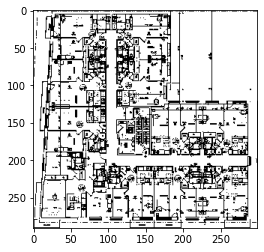

Max volume is 4365


KeyboardInterrupt: 

In [6]:
binary_img = get_binary_img('floorplans/floor_plan_sample_low_res.png')
plt.imshow(binary_img, cmap='gray')
plt.show()

dupe_binary_img = duplicate_pixels(binary_img, 0, 2)
# plt.imshow(dupe_binary_img, cmap='gray')
# plt.show()

print('Max volume is {}'.format(int(.05*(dupe_binary_img.shape[0]*dupe_binary_img.shape[1]))))
filled_img = volume_filler(dupe_binary_img, 1, 0, int(.01*(dupe_binary_img.shape[0]*dupe_binary_img.shape[1])))
plt.imshow(filled_img, cmap='gray')
plt.show()

skeleton_img = skeletonize_img_array(filled_img)
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(filled_img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

# binary_img = np.array([
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
#     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
#     [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0], 
#     [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0], 
#     [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0], 
#     [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], 
#     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], 
# ])

# print(binary_img)
# print(volume_filler(binary_img, 1, 0, 20))
# print(binary_img)
# print(volume_filler(binary_img, 1, 0, 9));

# plt.imshow(binary_img, cmap='gray')
# plt.show()

# binary_img = duplicate_pixels(binary_img, 1, 6)
# plt.imshow(binary_img, cmap='gray')
# plt.show()

In [ ]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

# perform skeletonization
skeleton_img = invert(skeletonize_img_path("floorplans/research_paper_sample_binarization.png"))

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(skeleton_img)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(skeleton_img, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(skeleton_img, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()

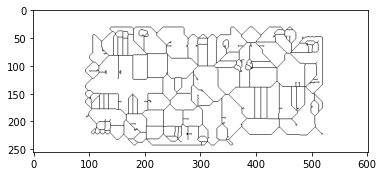

(206, 473)
(39, 240)


In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm

from dijkstar import Graph, find_path

# perform skeletonization
skeleton_img = skeletonize_img_path("floorplans/research_paper_sample_binarization_test.png")
plt.imshow(skeleton_img, cmap=cm.gray)
plt.show()

def create_vertices(img, wipeout_value, radius=4):
    visited = {}
    vertices = {}
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] != wipeout_value and not is_visited(visited, i, j):
                set_visited(vertices, i, j)
                set_visited(visited, i, j)
                erase_surrounding(img, radius, wipeout_value, i, j, visited)
    return [(i, j) for i in vertices for j in vertices[i] ]
                
def erase_surrounding(img, radius, wipeout_value, i, j, visited):
    i_start = max(0, i-radius)
    i_end = min(img.shape[0], i+radius)
    j_start = max(0, j-radius)
    j_end = min(img.shape[1], j+radius)
    for i_curr in range(i_start, i_end):
        for j_curr in range(j_start, j_end):
            if is_visited(visited, i_curr, j_curr):
                continue
            if math.hypot(i - i_curr, j - j_curr) < radius:
                set_visited(visited, i_curr, j_curr)
                img[i_curr][j_curr] = wipeout_value

def is_visited(visited, i, j):
    return i in visited and j in visited[i]

def set_visited(visited, i, j):
    if i not in visited:
        visited[i] = {}
    visited[i][j] = True

class Edge:
    def __init__(self, coordinates, distance):
        self.coordinates = coordinates
        self.distance = distance
    
    def get_coordinates(self):
        return self.coordinates

    def get_distance(self):
        return self.distance
    
class Node:
    def __init__(self, coordinates):
        self.edges = []
        self.coordinates = coordinates

    def get_coordinates(self):
        return self.coordinates
        
    def add_edge(self, edge):
        self.edges.append(edge)
        
    def get_edges(self):
        return self.edges

def create_nodes_and_edges(vertices, radius):
    nodes = []
    for i, vertex in enumerate(vertices):
        current_node = Node(vertex)
        nodes.append(current_node)
        for j in range(len(vertices)):
            if i == j:
                continue
            other_vertex =  vertices[j]
            curr_distance = math.hypot(vertex[0] - other_vertex[0], vertex[1] - other_vertex[1])
            if  curr_distance <= (radius*2):
                current_node.add_edge(Edge(other_vertex, curr_distance))
    return nodes
        
def plot_nodes(nodes_and_edges, dot_color="blue", line_color="red"):
    for node in nodes_and_edges:
        node_coordinates = node.get_coordinates()
        for edge in node.get_edges():
            edge_coordinates = edge.get_coordinates()
            plt.plot(node_coordinates[1], node_coordinates[0], marker='.', color=dot_color)
            plt.plot(edge_coordinates[1], edge_coordinates[0], marker='.', color=dot_color)
            x = [node_coordinates[1], edge_coordinates[1]]
            y = [node_coordinates[0], edge_coordinates[0]]
            plt.plot(x, y, color=line_color, linewidth=2)
            
class NodeBag:  
    def __init__(self):
        self.node_coord_to_id = {}
        self.node_id_to_coord = {}
        self.node_counter = 0

    def get_node_id(self, coordinates):
        if coordinates[0] not in self.node_coord_to_id:
            self.node_coord_to_id[coordinates[0]] = {}
        if coordinates[1] not in self.node_coord_to_id[coordinates[0]]:
            self.node_coord_to_id[coordinates[0]][coordinates[1]] = self.node_counter
            self.node_id_to_coord[self.node_counter] = coordinates
            self.node_counter += 1
        return self.node_coord_to_id[coordinates[0]][coordinates[1]]
    
    def get_coordinates(self, node_id):
        return self.node_id_to_coord[node_id]
    
def get_node(node_dictionary, i, j):
    if i not in node_dictionary:
        node_dictionary[i] = {}
    node_dictionary[i][j] = True

def find_shortest_path_to_node(source_node, nodes):
    min_distance = None
    min_coordinate = None
    for node in nodes:
        other_node = node.get_coordinates()
        curr_distance = math.hypot(source_node[0] - other_node[0], source_node[1] - other_node[1])
        if min_distance is None or curr_distance <= min_distance:
            min_distance = curr_distance
            min_coordinate = other_node
    return min_coordinate
    
def shortest_path(nodes_and_edges, source_coordinates, destination_coordinates):
    graph = Graph()
    unique_node_count = 0
    node_bag = NodeBag()
    
    source_coordinates = find_shortest_path_to_node(source_coordinates, nodes_and_edges)
    destination_coordinates = find_shortest_path_to_node(destination_coordinates, nodes_and_edges)
    
    for node in nodes_and_edges:
        node_coordinates = node.get_coordinates()
        for edge in node.get_edges():
            edge_coordinates = edge.get_coordinates()
            edge_distance = edge.get_distance()
            
            node_id = node_bag.get_node_id(node_coordinates)
            edge_node_id = node_bag.get_node_id(edge_coordinates)
            graph.add_edge(node_id, edge_node_id, edge_distance)

    path = find_path(graph, node_bag.get_node_id(source_coordinates), node_bag.get_node_id(destination_coordinates))
    return [node_bag.get_coordinates(node_id) for node_id in path.nodes] 

def plot_path(nodes, dot_color="blue", line_color="red"):
    last_node = None
    for node_coordinates in nodes:
        plt.plot(node_coordinates[1], node_coordinates[0], marker='.', color=dot_color)
        if last_node is not None:
            x = [last_node[1], node_coordinates[1]]
            y = [last_node[0], node_coordinates[0]]
            plt.plot(x, y, color=line_color, linewidth=2)
        last_node = node_coordinates

def plot_source_and_destination(source_coordinate, destination_coordinate):
    plt.plot(source_coordinate[1], source_coordinate[0], marker='*', color='green')
    plt.plot(destination_coordinate[1], destination_coordinate[0], marker='*', color='green')
    
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

def get_color_coordinates(img_path, coordinate_color):
    img = plt.imread(img_path)
    img = img_as_ubyte(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rgb = rgb_to_hex((img[i][j][0], img[i][j][1], img[i][j][2]))
            if rgb == coordinate_color:
                return (i, j)

print(get_color_coordinates("floorplans/research_paper_sample_binarization_test.png", 'ff0000'))

print(get_color_coordinates("floorplans/research_paper_sample_binarization_test.png", '00ff00'))

# radius = 8
# vertices = create_vertices(skeleton_img, 1, radius)
# print(vertices)
# plt.imshow(skeleton_img, cmap=cm.gray)
# plt.show()
# nodes_and_edges = create_nodes_and_edges(vertices, radius)
# plt.imshow(skeleton_img, cmap=cm.gray)
# plot_nodes(nodes_and_edges, dot_color="blue", line_color="red")
# plt.show()

# shortest_path_list = shortest_path(nodes_and_edges)
# print(shortest_path_list)
# plt.imshow(skeleton_img, cmap=cm.gray)
# plot_path(shortest_path_list)
# plt.show()




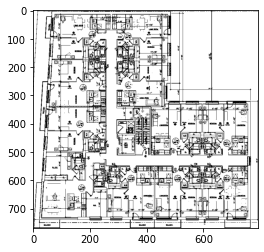

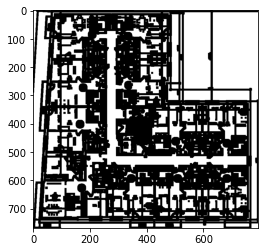

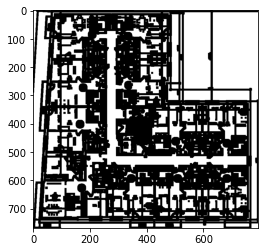

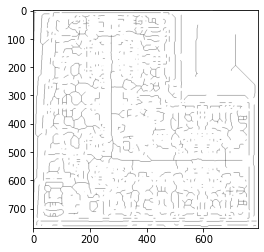

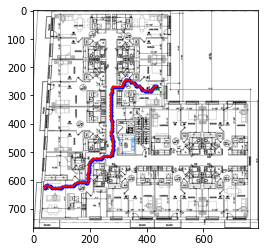

In [45]:
# Now to define the API 
def find_shortest_path(filepath):
    source_coordinates = get_color_coordinates(filepath, '00ff00')
    destination_coordinates = get_color_coordinates(filepath, 'ff0000')

    img = plt.imread(filepath)
    img = img_as_ubyte(img)
    gray_img = convert_to_gray(img)
    binary_img = binarize_img(gray_img)
    plt.imshow(binary_img, cmap=cm.gray)
    plt.show()
    dupe_binary_img = duplicate_pixels(binary_img, 0, 6)
    
    plt.imshow(dupe_binary_img, cmap=cm.gray)
    plt.show()
    filled_img = dupe_binary_img
#     filled_img = volume_filler(dupe_binary_img, 1, 0, int(.05*(dupe_binary_img.shape[0]*dupe_binary_img.shape[1])))
    plt.imshow(filled_img, cmap=cm.gray)
    plt.show()
    skeleton_img = skeletonize_img_array(filled_img)
    plt.imshow(skeleton_img, cmap=cm.gray)
    plt.show()

    radius = 5
    vertices = create_vertices(skeleton_img, 1, radius)
    nodes_and_edges = create_nodes_and_edges(vertices, radius)    
    shortest_path_list = shortest_path(nodes_and_edges, source_coordinates, destination_coordinates)
    
    plt.imshow(img, cmap=cm.gray)
    plot_source_and_destination(source_coordinates, destination_coordinates)
    plot_path(shortest_path_list)
    plt.show()
    
find_shortest_path("floorplans/floor_plan_sample_test.png")

In [194]:
thinning_structuring_elements = [
    [[0, 0, 0], [-1, 1, -1], [1, 1, 1]], 
    [[1, 1, 1], [-1, 1, -1], [0, 0, 0]], 
    [[1, -1, 0], [1, 1, 0], [1, -1, 0]], 
    [[0, -1, 1], [0, 1, 1], [0, -1, 1]], 
    
    [[-1, 0, 0], [1, 1, 0], [-1, 1, -1]], 
    [[-1, 1, -1], [1, 1, 0], [-1, 0, 0]], 
    [[-1, 1, -1], [0, 1, 1], [0, 0, -1]], 
    [[0, 0, -1], [0, 1, 1], [-1, 1, -1]], 
]

thinning_structuring_elements = [
#     [[0, 1, 0], [0, 1, 0], [0, 1, 0]], 
    [[0, 0, 0], [1, 1, 1], [0, 0, 0]], 
]

sample_img = [
    [1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1], 
    [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], 
    [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1], 
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
    [1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1], 
    [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0], 
    [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1], 
]

def get_ith_structure(img, i, j, w):
    curr_i = i - (w - 1)//2
    end_i = curr_i + w
    start_j = j - (w - 1)//2
    end_j = start_j + w
    
#     print('Starting i')
#     print(curr_i)
#     print('Ending i')
#     print(end_i)
    
#     print('Starting j')
#     print(start_j)
#     print('Ending j')
#     print(end_j)
    
    ith_structure = np.empty(w*w)

    curr_j = start_j
    flat_i = 0
    while curr_i < end_i:
        while curr_j < end_j:
            if curr_i < 0 or curr_i >= len(img) or curr_j < 0 or curr_j >= len(img[0]):
                ith_structure[flat_i] = 0
            else:
                ith_structure[flat_i] = img[curr_i][curr_j]
            curr_j += 1
            flat_i += 1
        curr_j = start_j
        curr_i += 1
    ith_structure.shape = (w, w)
    return ith_structure

def erosion(sub_img, structure):
#     print('Doing erosion for')
#     print(sub_img)
#     print(structure)
    for i in range(len(sub_img)):
        for j in range(len(sub_img[i])):
            if structure[i][j] == -1:
                continue
            elif structure[i][j] != sub_img[i][j]:
                return 0
    print('HERE FOR')
    print(sub_img)
    return 1
    
def hit_n_miss_filter(img, structures):
    img_copy = np.array(img, copy=True)
    transformation = np.array(img_copy, copy=True)
    print(transformation)
#     while True:
    for structure in structures:
        for i in range(len(img_copy)):
            for j in range(len(img_copy[i])):
                sub_img = get_ith_structure(img_copy, i, j, len(structure))
                new_pixel_value = erosion(sub_img, structure)
                if new_pixel_value != img_copy[i][j]:
                    transformation[i][j] = new_pixel_value
                print(transformation[i][j])
    print(transformation)
    print(img_copy)
    if not np.array_equal(img_copy, transformation):
        img_copy = transformation
        transformation = np.array(img_copy, copy=True)
#         else:
#             break
    return img_copy

In [ ]:
x = {1: {4: {}}}
print(3 in x and 7 in x[3])